In [1]:
import sys
!{sys.executable} -m pip install pandas nltk scikit-learn networkx python-louvain matplotlib eventregistry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 72.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 86.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 56.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [nltk]7/8 [nltk]t-learn]


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

print("Caricamento del dataset completo")
try:
    df_full = pd.read_csv('articoli_italia_ultimi_30_giorni.csv')
    print("DataFrame completo caricato con successo!")
    # Rimuovi subito righe senza contenuto per pulizia
    df_full.dropna(subset=['content'], inplace=True)
    print(f"Dimensioni: {df_full.shape}")
except FileNotFoundError:
    assert False, "File 'articoli_italia_ultimi_30_giorni.csv' non trovato."

keywords = {
    'Politica': ['politica', 'governo', 'parlamento', 'elezioni', 'decreto', 'legge', 
                 'ministro', 'partito', 'premier', 'meloni', 'schlein', 'conte'],
    'Economia': ['economia', 'finanza', 'borsa', 'inflazione', 'spread', 'debito', 
                 'pil', 'bce', 'lavoro', 'imprese', 'mercato', 'azioni'],
    'Cronaca': ['cronaca', 'incidente', 'omicidio', 'arrestato', 'indagini', 'delitto', 
                'tragedia', 'carabinieri', 'polizia', 'vittima', 'processo'],
    'Guerra': ['iran', 'missili', 'gaza', 'israele', 'ucraina', 'russia', 
                'netanyahu', 'mosca', 'hamas']
}

def assign_category(text):
    if not isinstance(text, str):
        return 'Sconosciuta'
    
    text = text.lower()
    
    scores = {category: 0 for category in keywords}
    for category, kws in keywords.items():
        for kw in kws:
            if kw in text:
                scores[category] += 1
    
    max_score_category = max(scores, key=scores.get)
    if scores[max_score_category] > 0:
        return max_score_category
    else:
        return 'Altro'

print("Assegnazione delle categorie agli articoli")
df_full['category'] = df_full['content'].apply(assign_category)

target_categories = ['Politica', 'Economia', 'Cronaca','Guerra']
df_filtered = df_full[df_full['category'].isin(target_categories)].copy()

print("\nDistribuzione degli articoli per categoria:")
print(df_filtered['category'].value_counts())

print(f"\nDataset filtrato di dimensioni: {df_filtered.shape}")

# Elimino dal dataframe originale le colonne non necessarie
df_filtered = df_filtered[['source', 'title', 'content', 'published_at', 'category']].copy()
print(df_filtered.head())

Caricamento del dataset completo
DataFrame completo caricato con successo!
Dimensioni: (32900, 6)
Assegnazione delle categorie agli articoli

Distribuzione degli articoli per categoria:
category
Politica    10510
Economia     9188
Cronaca      3710
Guerra       2885
Name: count, dtype: int64

Dataset filtrato di dimensioni: (26293, 7)
            source                                              title  \
0          ANSA.it  In arriva decreto nuova Maturità, orale sarà o...   
2  HuffPost Italia  Israele chiama, molti riservisti non rispondon...   
3  HuffPost Italia  Addio a Emilio Fede, il destriero del Cavalier...   
4  HuffPost Italia  L'inedito invito. Leone XIV chiama in Vaticano...   
6          ANSA.it  L'Enpam consegnerà il suo 2% di Mediobanca a M...   

                                             content          published_at  \
0  Arriverà giovedì in Consiglio dei ministri il ...  2025-09-02T16:44:51Z   
2  È il giorno della più grande chiamata alle arm...  2025-09-02T16:

In [3]:
!pip install rake-nltk

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
from rake_nltk import Rake

if 'df_full' in locals() and 'df_politica' not in locals():
    print("Ricreo il DataFrame di politica...")
    keywords = {
        'Politica': ['politica', 'governo', 'parlamento', 'elezioni', 'decreto', 'legge', 'ministro', 'partito', 'premier', 'meloni', 'schlein', 'conte'],
        'Economia': ['economia', 'finanza', 'borsa', 'inflazione', 'spread', 'debito', 'pil', 'bce', 'lavoro', 'imprese', 'mercato', 'azioni'],
        'Cronaca': ['cronaca', 'incidente', 'omicidio', 'arrestato', 'indagini', 'delitto', 'tragedia', 'carabinieri', 'polizia', 'vittima', 'processo'],
        'Guerra': ['iran', 'missili', 'gaza', 'israele', 'ucraina', 'russia', 'netanyahu', 'mosca', 'hamas']
    }
    def assign_category(text):
        if not isinstance(text, str): return 'Sconosciuta'
        text = text.lower()
        scores = {category: 0 for category in keywords}
        for category, kws in keywords.items():
            for kw in kws:
                if kw in text: scores[category] += 1
        max_score_category = max(scores, key=scores.get)
        if scores[max_score_category] > 0: return max_score_category
        else: return 'Altro'
    df_full['category'] = df_full['content'].apply(assign_category)
    df_politica = df_full[df_full['category'] == 'Politica'].copy()
    print(f"Dataset di Politica ricreato con {len(df_politica)} articoli.")


try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    # Aggiungo il download per la risorsa mancante
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

it_stopwords = stopwords.words('italian')
rake_nltk_var = Rake(language='italian', stopwords=it_stopwords, min_length=2, max_length=4)

def extract_keywords(text):
    if not isinstance(text, str):
        return []
    rake_nltk_var.extract_keywords_from_text(text)
    return rake_nltk_var.get_ranked_phrases()[:10]

# Applico l'estrazione delle keyword alla colonna 'content'
df_politica['keywords'] = df_politica['content'].apply(extract_keywords)

# Eseguo il preprocessing del testo per TF-IDF
tokenizer = RegexpTokenizer(r'\w+')
def preprocess_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in it_stopwords and len(word) > 2]
    return " ".join(filtered_tokens)
df_politica['processed_text'] = df_politica['content'].apply(preprocess_text)

print("\nEsempio di keyword estratte dal primo articolo di politica:")
print(df_politica[['title', 'keywords']].head(1))

df = df_politica

Ricreo il DataFrame di politica...
Dataset di Politica ricreato con 10510 articoli.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Esempio di keyword estratte dal primo articolo di politica:
                                               title  \
0  In arriva decreto nuova Maturità, orale sarà o...   

                                            keywords  
0  [anno scolastico mentre finora, prossimo anno ...  


In [5]:
!pip install scikit-learn

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Rete con doppio filtro di Similarità + Keyword Overlap
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])
print(f"Matrice TF-IDF creata. Dimensioni: {tfidf_matrix.shape}")

k = 10 # numero di vicini simili da trovare
nbrs = NearestNeighbors(n_neighbors=k, metric='cosine').fit(tfidf_matrix)
distances, indices = nbrs.kneighbors(tfidf_matrix)

G = nx.Graph()
df.reset_index(drop=True, inplace=True)
df['article_id'] = df.index

for i in range(len(df)):
    G.add_node(df.loc[i, 'article_id'], source=df.loc[i, 'source'], title=df.loc[i, 'title'])

KEYWORD_OVERLAP_THRESHOLD = 2 # almeno 2 keyword in comune per creare un arco

for i in range(indices.shape[0]):
    # prendo le keyword dell'articolo di partenza
    source_keywords = set(df.loc[i, 'keywords'])
    
    for j_idx in range(1, k):
        neighbor_index = indices[i][j_idx]
        
        similarity = 1 - distances[i][j_idx]
        if similarity > 0.6: # soglia di similarità
            
            # keyworld overlap
            neighbor_keywords = set(df.loc[neighbor_index, 'keywords'])
            common_keywords_count = len(source_keywords.intersection(neighbor_keywords))
            
            if common_keywords_count >= KEYWORD_OVERLAP_THRESHOLD:
                G.add_edge(df.loc[i, 'article_id'], 
                           df.loc[neighbor_index, 'article_id'], 
                           weight=similarity)

print("\nRete creata!")
print(f"Nodi: {G.number_of_nodes()}, Archi: {G.number_of_edges()}")

Matrice TF-IDF creata. Dimensioni: (10510, 5000)

Rete creata!
Nodi: 10510, Archi: 4321



 Analisi delle community
Rilevate 8426 community.

Prime 10 community per dimensione:
community
5743    24
5691    20
6488    18
6833    18
979     17
3735    17
5991    15
1532    14
7654    13
666     12
87      12
411     11
467     11
3137    11
6016    11
3439    10
4195    10
4550     9
6934     9
5225     9
Name: count, dtype: int64

--- Analisi della Community #5743 (Dimensione: 24 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it              16.67
HuffPost Italia       8.33
La Repubblica.it      8.33
Il Mattino            8.33
Quotidiano Libero     8.33
Name: proportion, dtype: float64

Titoli di esempio:
 - Piantedosi gela Giuli, 'anche Casapound nella lista degli sgomberi' - Notizie - Ansa.it
 - Piantedosi: "Sgombero di CasaPound? Prima o poi arriverà anche il suo turno"
 - Piantedosi: 'anche CasaPound rientra negli sgomberi' - Notizie - Ansa.it
 - Sgomberi, Piantedosi: "Toccherà anche a Casa Pound". E sul video di Almasri: "Pare di tanti anni fa"
 - Pianted

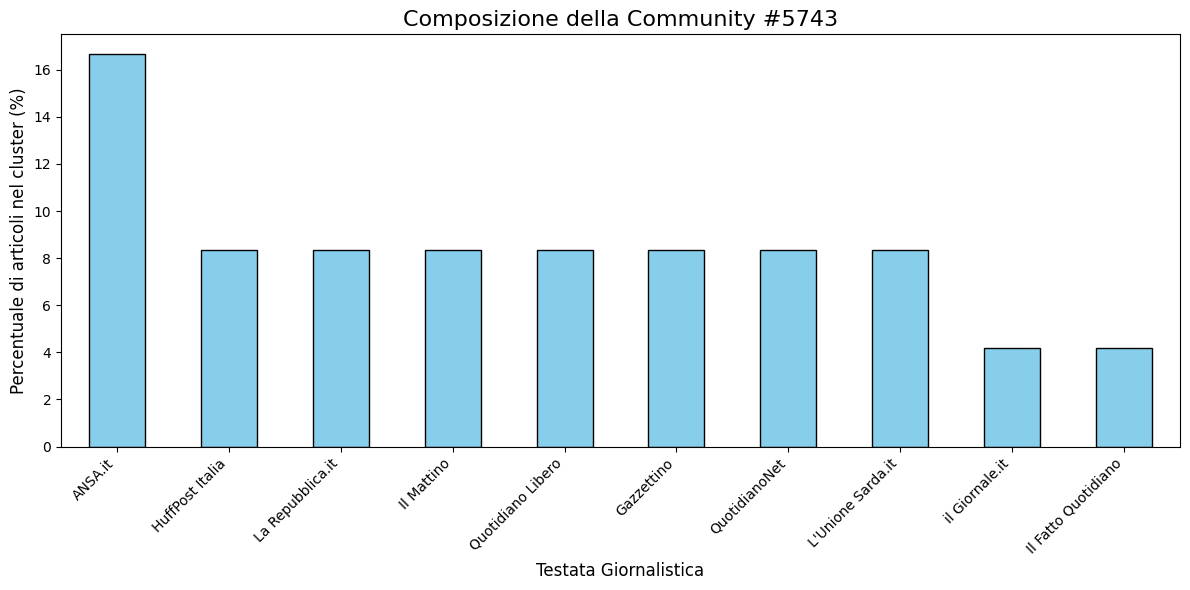


--- Analisi della Community #5691 (Dimensione: 20 articoli) ---
Distribuzione delle testate (in %):
source
Il Messaggero          25.0
Quotidiano Libero      15.0
L'Unione Sarda.it      10.0
Il Fatto Quotidiano     5.0
il Giornale.it          5.0
Name: proportion, dtype: float64

Titoli di esempio:
 - Tajani: Parole di Salvini su Macron? "In politica conta forza delle idee, non violenza delle parole"
 - Ucraina, Tajani: "Salvini? Si vince con forza idee e non con violenza parole"
 - ++ Tajani,Salvini? Forza idee vince sempre su violenza parole ++ - Notizie - Ansa.it
 - Tajani non la manda a dire a Salvini: "La forza delle idee vince sempre sulla violenza delle parole"
 - Tajani a Salvini: "Politica estera la fa premier e ministro Esteri"
 - Tajani: Parole di Salvini su Macron? "In politica conta forza delle idee, non violenza delle parole"
 - Tajani a Salvini: politica estera la fa premier e ministro Esteri | Libero Quotidiano.it
 - Tajani: Parole di Salvini su Macron? "In politica co

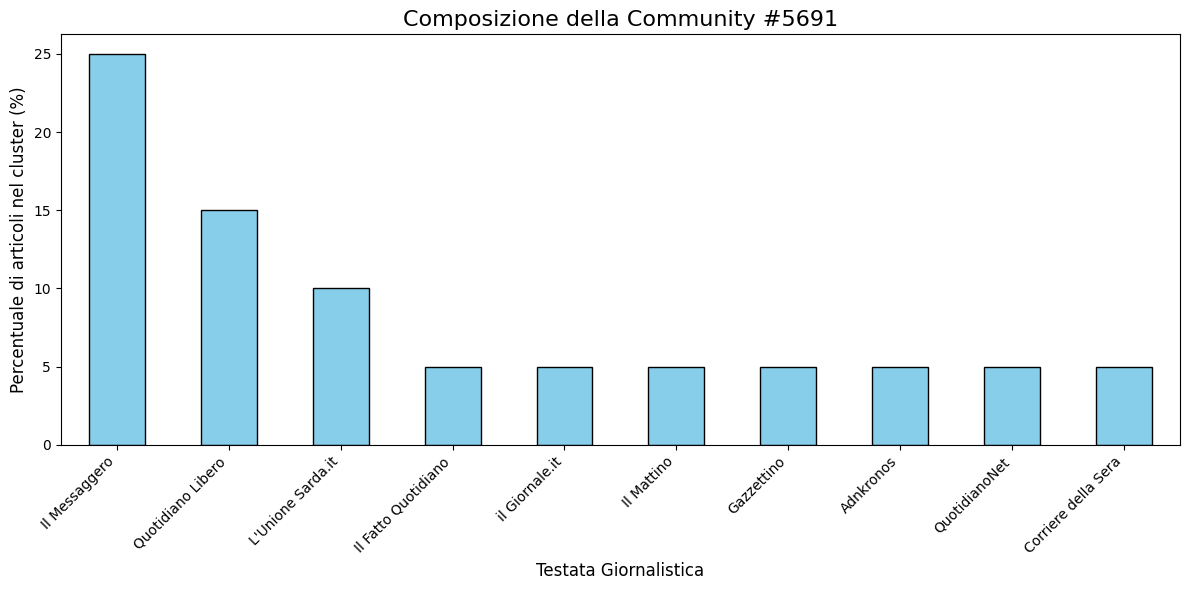


--- Analisi della Community #6488 (Dimensione: 18 articoli) ---
Distribuzione delle testate (in %):
source
Gazzettino             11.11
L'Unione Sarda.it      11.11
Il Fatto Quotidiano    11.11
QuotidianoNet          11.11
Quotidiano Libero      11.11
Name: proportion, dtype: float64

Titoli di esempio:
 - Almasri, "così ha ucciso a mani nude un civile in strada a Tripoli". Il video choc
 - Il video che mostrerebbe Almasri picchiare (uccidere?) nelle strade di Tripoli | Libero Quotidiano.it
 - Libia. Che cosa c'è nel video choc che ha riaperto il caso Almasri
 - Video shock di Almasri, Schlein e Conte attaccano Meloni: "Perché lo hai liberato?"
 - Il video che mostrerebbe Almasri picchiare (uccidere?) nelle strade di Tripoli - L'Unione Sarda.it
 - Video shock, 'Almasri uccide un civile in strada a Tripoli' - Ultima ora - Ansa.it
 - Almasri, accuse a Meloni dopo il video choc. Da Conte a Schlein: "Nulla da dire? Guarda chi hai liberato"
 - Il video shock: 'Almasri uccide un civile in s

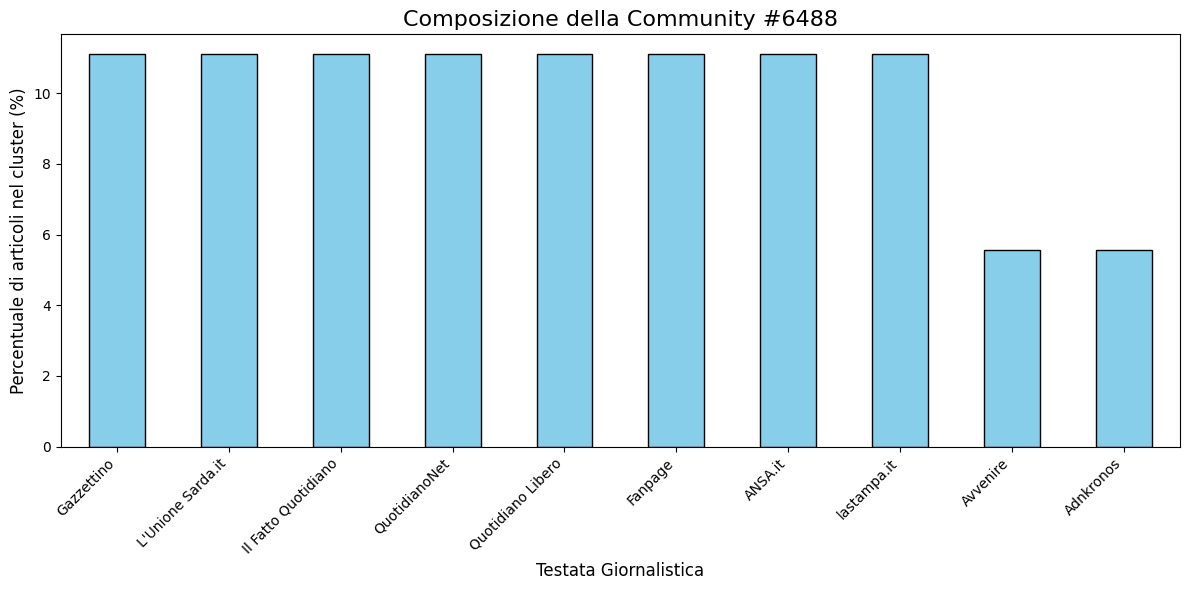


--- Analisi della Community #6833 (Dimensione: 18 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it              27.78
QuotidianoNet        16.67
Quotidiano Libero    16.67
Gazzettino           11.11
Il Mattino            5.56
Name: proportion, dtype: float64

Titoli di esempio:
 - Leoncavallo, sgombero dello storico centro sociale milanese al via. Meloni: "Non ci possono essere zone franche"
 - Al via lo sgombero del centro sociale Leoncavallo a Milano
 - Blitz d'agosto, sfrattato il Leoncavallo. La destra esulta - Notizie - Ansa.it
 - Leoncavallo, sgombero dello storico centro sociale milanese al via. Piantedosi: "Finisce lunga stagione di illegalità"
 - Meloni dà la linea: "Basta zone franche". E subito la sinistra sta con gli okkupanti
 - Leoncavallo, Meloni fa impazzire la sinistra: "Basta aree sottratte alla legalità" | Libero Quotidiano.it
 - Milano, sgomberato il Leoncavallo. Salvini "saluta" i centri sociali: "Afuera!" | Libero Quotidiano.it
 - Meloni e il gove

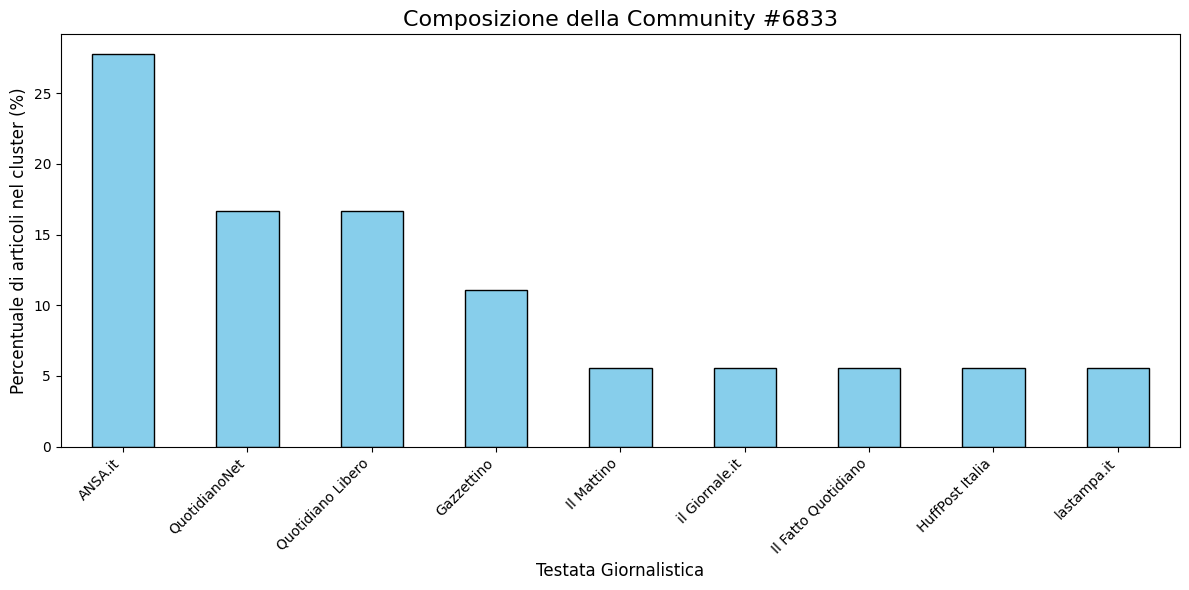


--- Analisi della Community #979 (Dimensione: 17 articoli) ---
Distribuzione delle testate (in %):
source
Adnkronos         11.76
QuotidianoNet     11.76
il Giornale.it    11.76
ANSA.it           11.76
Avvenire           5.88
Name: proportion, dtype: float64

Titoli di esempio:
 - Francia, Bayrou accusa l'Italia di dumping fiscale. Ira di Palazzo Chigi: "Affermazioni totalmente infondate"
 - Scontro Italia-Francia: Bayrou accusa Roma di dumping fiscale, Palazzo Chigi replica
 - La Francia accusa l'Italia di dumping fiscale. Ira di Palazzo Chigi: "Affermazioni totalmente infondate"
 - Il premier francese Bayrou accusa l'Italia di 'dumping fiscale', Palazzo Chigi replica: "Affermazioni infondate
 - "Italia scorretta sul fisco". Nuovo scontro con Parigi
 - "Italia fa dumping fiscale". "Falso". Scontro a distanza Bayrou-Meloni
 - Bayrou attacca l'Italia: "Fa dumping fiscale". La dura risposta da Chigi | Libero Quotidiano.it
 - P.Chigi, stupisce Bayrou, affermazioni infondate su dumping - 

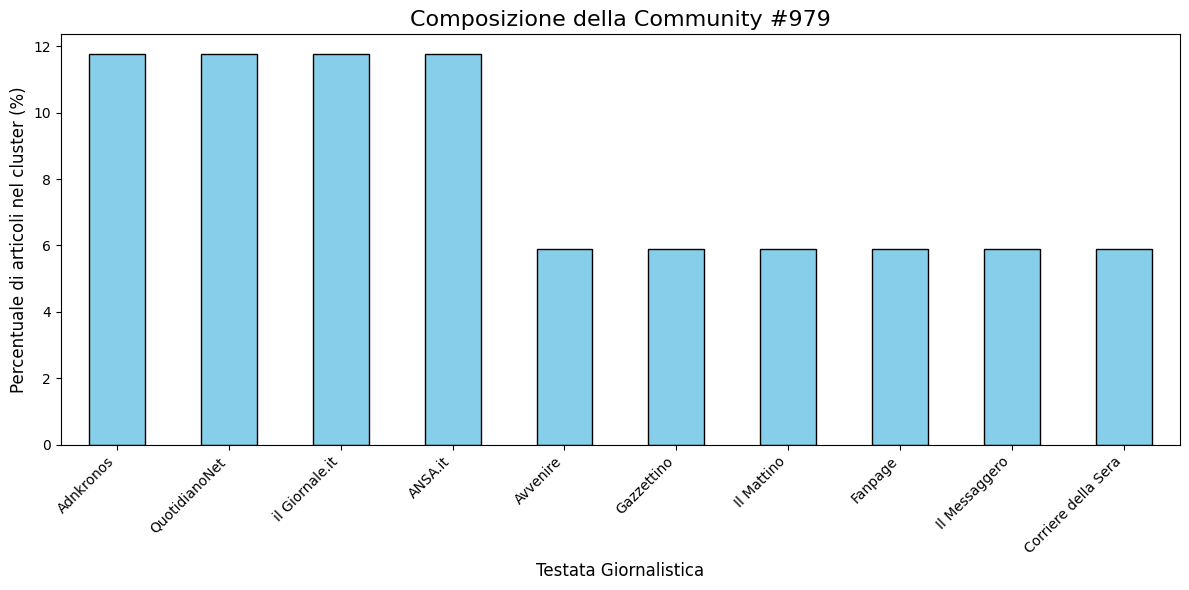


--- Analisi della Community #3735 (Dimensione: 17 articoli) ---
Distribuzione delle testate (in %):
source
Quotidiano Libero    35.29
L'Unione Sarda.it    29.41
Gazzettino           23.53
Il Messaggero        11.76
Name: proportion, dtype: float64

Titoli di esempio:
 - Giustizia, Meloni: avanti con la riforma per liberarla da politica - L'Unione Sarda.it
 - Meloni: Draghi ha ragione, Ue condannata all'irrilevanza geopolitica
 - Migranti, Meloni: "Nessun giudice ci impedirà di governare fenomeno con serietà" | Libero Quotidiano.it
 - Meloni: Draghi ha ragione, Ue condannata all'irrilevanza geopolitica - L'Unione Sarda.it
 - Guerra Ucraina, Meloni: La principale proposta sul tavolo è la nostra su articolo 5 Nato | Libero Quotidiano.it
 - Meloni: Avanti con la riforma della Giustizia nonostante la minoranza di magistrati politicizzati | Libero Quotidiano.it
 - Meloni: Condanniamo l'ingiusta uccisione di giornalisti a Gaza - L'Unione Sarda.it
 - Meloni su riforma Giustizia: "Andremo avan

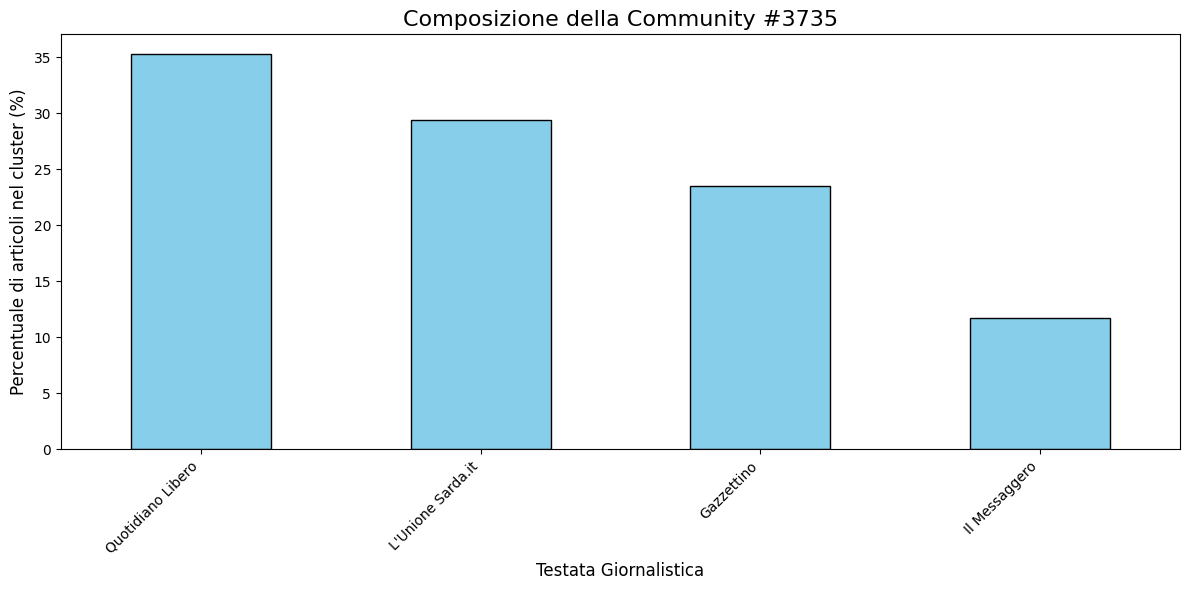


--- Analisi della Community #5991 (Dimensione: 15 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it              20.00
La Repubblica.it     13.33
Il Sole 24 ORE        6.67
il Giornale.it        6.67
L'Unione Sarda.it     6.67
Name: proportion, dtype: float64

Titoli di esempio:
 - Parigi convoca l'ambasciatrice italiana: "Da Salvini commenti inaccettabili su Macron"
 - Matteo Salvini a Macron: "Vai tu a combattere in Ucraina". Parigi convoca l'ambasciatrice italiana: "Commenti inaccettabili"
 - "Macron, attaccati al tram": la Francia convoca l'ambasciatrice italiana dopo le parole di Salvini. "Inaccettabili"
 - Salvini ancora contro Macron sulle truppe in Ucraina, Parigi convoca l'ambasciatrice italiana: "Commenti inaccettabili"
 - Alta tensione diplomatica. Parigi convoca l'ambasciatrice italiana per le sparate di Salvini
 - Salvini contro Macron sulle truppe in Ucraina, Parigi convoca l'ambasciatrice italiana - Europa - Ansa.it
 - Salvini a Macron: "Attaccati al tram

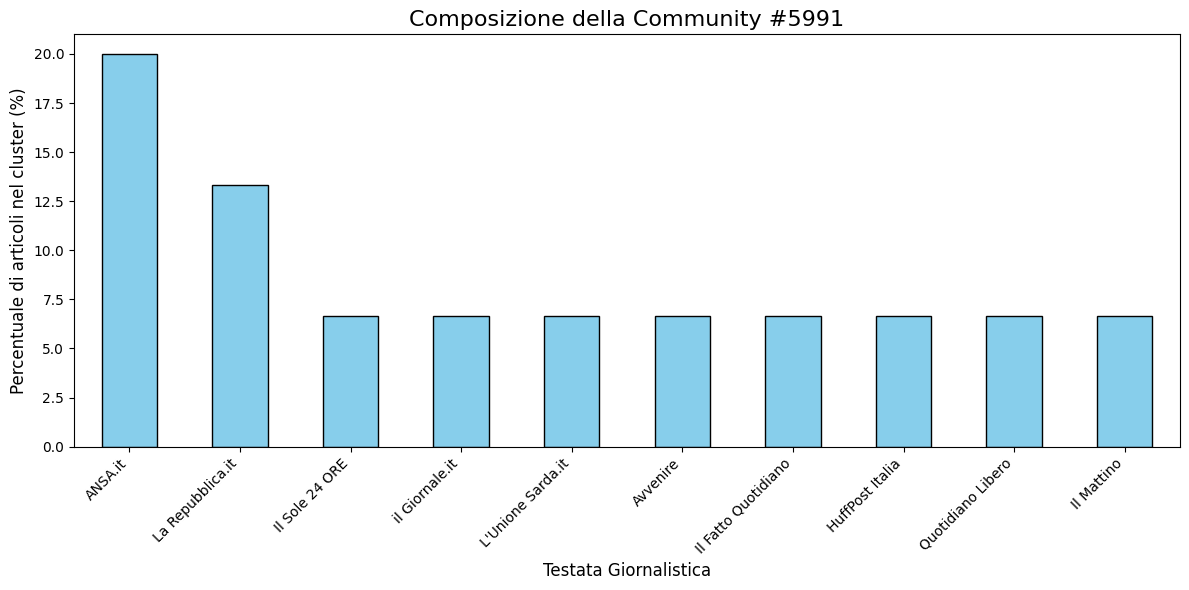


--- Analisi della Community #1532 (Dimensione: 14 articoli) ---
Distribuzione delle testate (in %):
source
Fanpage                14.29
QuotidianoNet          14.29
Il Fatto Quotidiano     7.14
Avvenire                7.14
il Giornale.it          7.14
Name: proportion, dtype: float64

Titoli di esempio:
 - La Corte d'appello degli Stati Uniti blocca i dazi: "Sono illegali". Ira Trump: "Ora ricorso"
 - Dazi, colpo di scena. Corte d'appello Usa: "Sono in gran parte illegali" - L'Unione Sarda.it
 - Corte d'appello Usa boccia i dazi di Trump: "Sono in gran parte illegali". Il tycoon annuncia ricorso: "Disastro totale"
 - I nuovi dazi Usa anche sui regali portati in valigia: cosa ci costerà quel che mettiamo nel trolley
 - Dazi, Corte d'appello Usa boccia le tariffe di Trump: "In gran parte illegali". Lui: "Sono in vigore, faremo ricorso. Così si distrugge il Paese"
 - Corte d'appello Usa, 'dazi Trump in gran parte illegali'
 - Stati Uniti. Corte d'appello boccia i dazi di Trump: "Illegali

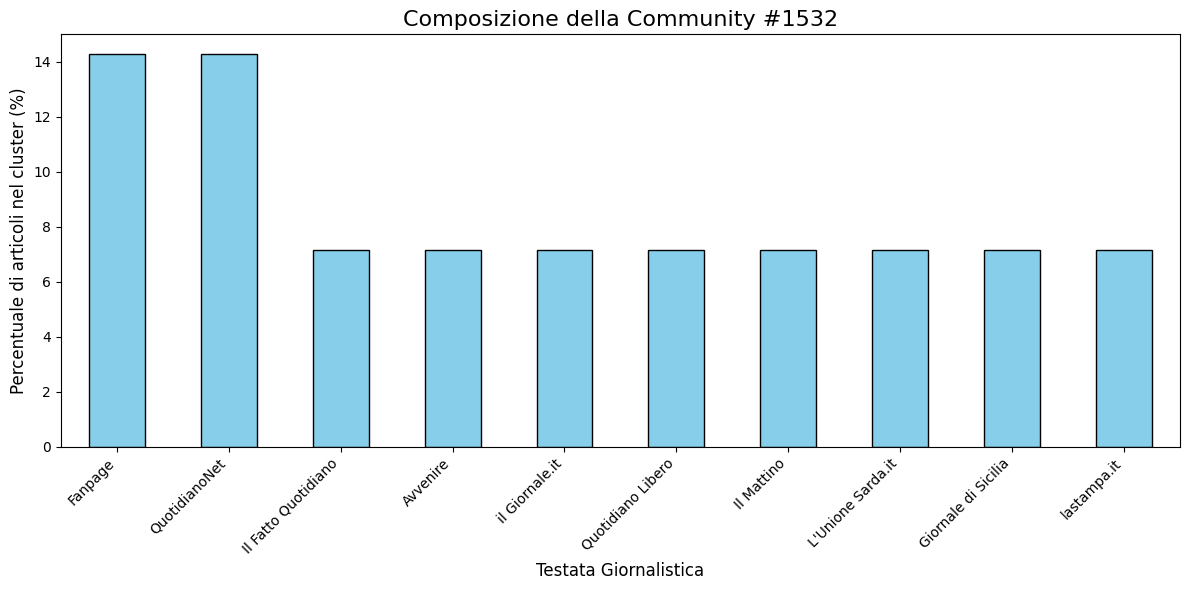


--- Analisi della Community #7654 (Dimensione: 13 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it          30.77
Gazzettino       23.08
Adnkronos         7.69
lastampa.it       7.69
QuotidianoNet     7.69
Name: proportion, dtype: float64

Titoli di esempio:
 - Brennero, scontro fra regionale e merci sulla linea ferroviaria: 3 feriti, circolazione sospesa
 - Scontro tra treno merci e regionale su linea Brennero: tre feriti lievi e circolazione bloccata
 - Urto fra treni a Trento, due feriti. Sospesa la linea del Brennero. Salvini: 'Subito verifiche' - Notizie - Ansa.it
 - Incidente ferroviario a Trento tra regionale e merci, due feriti - Notizie - Ansa.it
 - Incidente Brennero-Trento, scontro fra treno regionale e merci: tre feriti
 - Incidente Brennero-Trento, scontro fra treno regionale e merci: due feriti
 - Incidente tra treni sulla linea Brennero-Trento: ci sono feriti. Carrozza del regionale esce dai binari dopo lo schianto con i carri merci staccati dal resto de

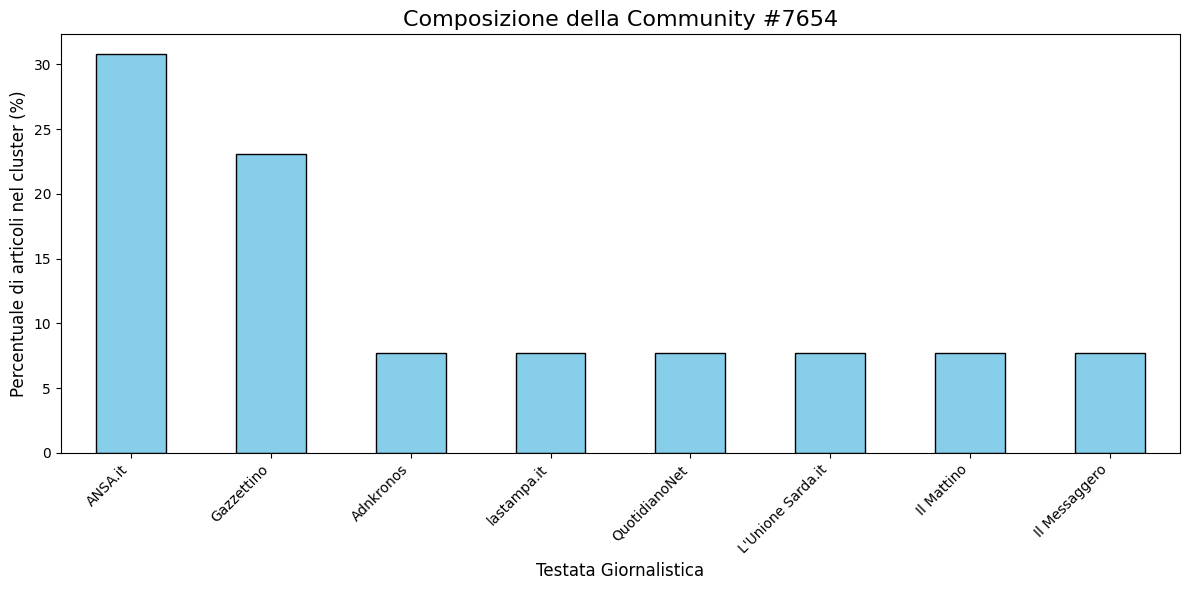


--- Analisi della Community #666 (Dimensione: 12 articoli) ---
Distribuzione delle testate (in %):
source
ANSA.it                50.00
L'Unione Sarda.it       8.33
Corriere della Sera     8.33
HuffPost Italia         8.33
Il Fatto Quotidiano     8.33
Name: proportion, dtype: float64

Titoli di esempio:
 - La Global Sumud Flotilla ripartita sulla rotta verso Gaza dopo la tempesta - L'Unione Sarda.it
 - La Global Sumud Flotilla ripartita da Barcellona verso Gaza - Notizie - Ansa.it
 - Ben Gvir minaccia gli attivisti della Sumud Flotilla: "Sarete trattati come terroristi"
 - Ben Gvir, attivisti Sumud saranno trattati come terroristi
 - Gaza, il ministro Ben-Gvir minaccia la Sumud Flotilla: "Li tratteremo come terroristi". Ancora morti palestinesi nei raid Idf - Il Fatto Quotidiano
 - La Global Sumud Flotilla è rientrata a Barcellona per il maltempo - Notizie - Ansa.it
 - Israele: "Gli attivisti della Flotilla saranno trattati come terroristi"
 - Ben Gvir, attivisti Sumud saranno trattati

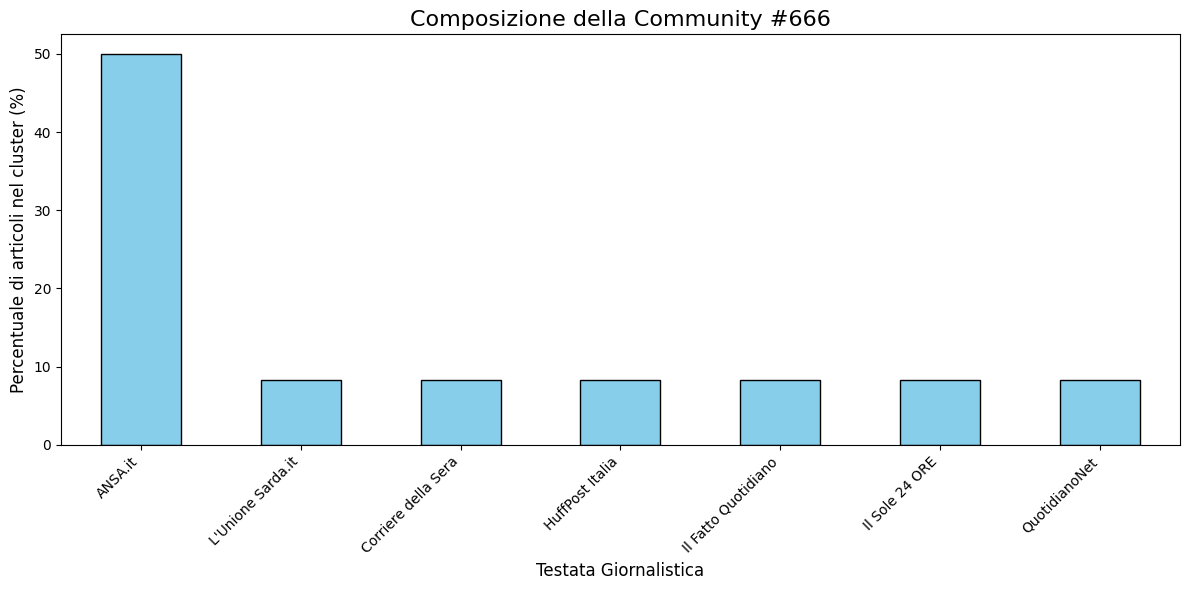


Analisi Completata


In [8]:
print("\n Analisi delle community")
partition = community_louvain.best_partition(G, weight='weight', random_state=42)
nx.set_node_attributes(G, partition, 'community')
print(f"Rilevate {len(set(partition.values()))} community.")
node_data = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
community_counts = node_data['community'].value_counts()
print("\nPrime 10 community per dimensione:")
print(community_counts.head(20))
N_TOP_COMMUNITIES = 10
for comm_id in community_counts.head(N_TOP_COMMUNITIES).index:
    print(f"\n--- Analisi della Community #{comm_id} (Dimensione: {community_counts[comm_id]} articoli) ---")
    community_nodes = node_data[node_data['community'] == comm_id]
    source_distribution = community_nodes['source'].value_counts(normalize=True) * 100
    print("Distribuzione delle testate (in %):")
    print(source_distribution.head(5).round(2))
    print("\nTitoli di esempio:")
    sample_titles = community_nodes.sample(min(10, len(community_nodes)))['title'].dropna()
    for title in sample_titles:
        print(f" - {title}")
    # Visualizzazione della composizione delle community
    plt.figure(figsize=(12, 6))
    source_distribution.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Composizione della Community #{comm_id}", fontsize=16)
    plt.ylabel("Percentuale di articoli nel cluster (%)", fontsize=12)
    plt.xlabel("Testata Giornalistica", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nAnalisi Completata")

Inizio visualizzazione della rete

Preparazione per la visualizzazione della Community #5991...
Disegno il grafo con 15 nodi e 63 archi. Potrebbe richiedere un momento...


/tmp/ipykernel_2182788/2497771681.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(sources_in_subgraph))


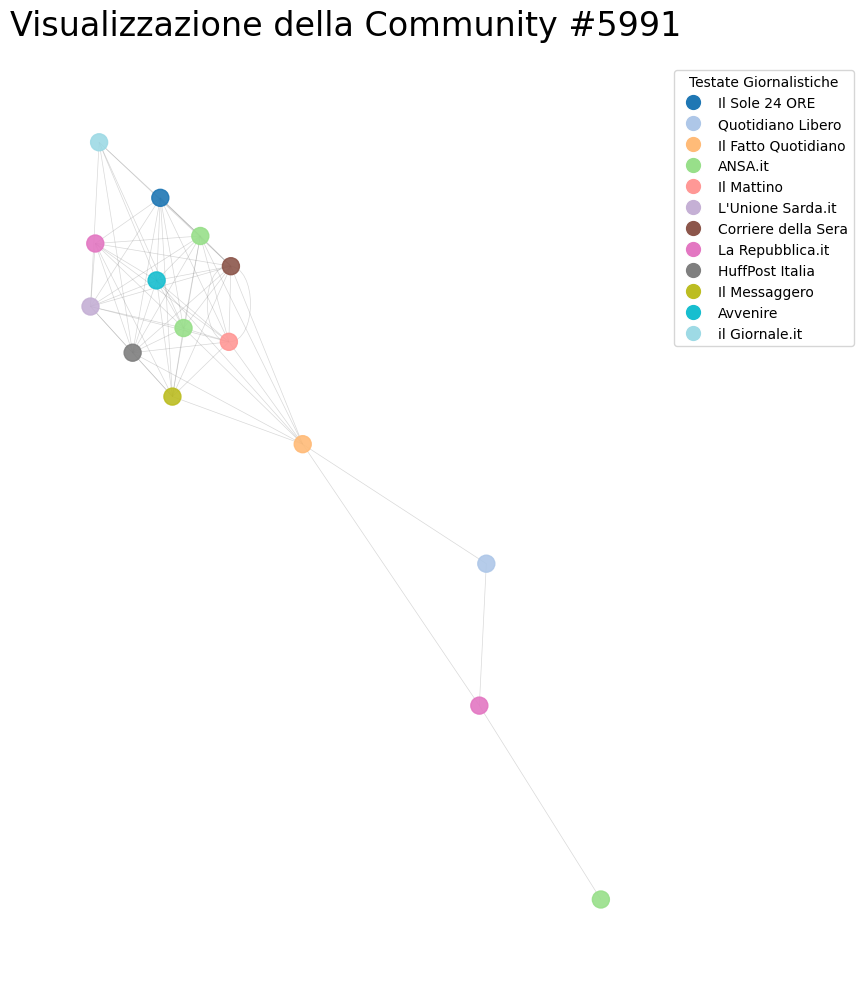

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

if 'G' not in locals() or 'node_data' not in locals():
    print("ERRORE: Esegui prima le celle di analisi per creare il grafo 'G' e il DataFrame 'node_data'.")
else:
    print("Inizio visualizzazione della rete")


    COMMUNITY_ID_TO_VISUALIZE = 5991 # Puoi cambiare questo numero con un altro ID

    print(f"\nPreparazione per la visualizzazione della Community #{COMMUNITY_ID_TO_VISUALIZE}...")

    # Creo subgrafo con nodi della community
    community_nodes_ids = node_data[node_data['community'] == COMMUNITY_ID_TO_VISUALIZE].index.tolist()
    
    subgraph = G.subgraph(community_nodes_ids)

    # Ottengo la lista unica delle testate presenti in questo subgraph
    sources_in_subgraph = pd.Series(nx.get_node_attributes(subgraph, 'source')).unique()
    
    # Ad ogni testata viene assegnato colore diverso. Usiamo un colormap predefinito per generare colori distinti
    colormap = plt.cm.get_cmap('tab20', len(sources_in_subgraph)) 
    source_to_color = {source: colormap(i) for i, source in enumerate(sources_in_subgraph)}
    
    # Crea la lista di colori per ogni nodo, nell'ordine corretto
    node_colors = [source_to_color[data['source']] for node, data in subgraph.nodes(data=True)]

    print(f"Disegno il grafo con {subgraph.number_of_nodes()} nodi e {subgraph.number_of_edges()} archi. Potrebbe richiedere un momento...")
    
    plt.figure(figsize=(10, 10)) # Crea una figura grande

    # Calcola la posizione dei nodi con un layout a molla
    pos = nx.spring_layout(subgraph, k=0.2, iterations=50, seed=42)
    
    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=150, alpha=0.9)
    nx.draw_networkx_edges(subgraph, pos, width=0.5, alpha=0.3, edge_color='grey')
    
    # Creiamo degli elementi grafici fittizi ("handles") per la legenda
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=source,
                               markerfacecolor=color, markersize=12) 
                      for source, color in source_to_color.items()]

    plt.legend(handles=legend_handles, title="Testate Giornalistiche", bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.title(f"Visualizzazione della Community #{COMMUNITY_ID_TO_VISUALIZE}", fontsize=24, pad=20)
    plt.box(False)
    fig = plt.gcf()
    fig.set_facecolor('white') # Sfondo bianco
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Fa spazio per la legenda
    plt.show()

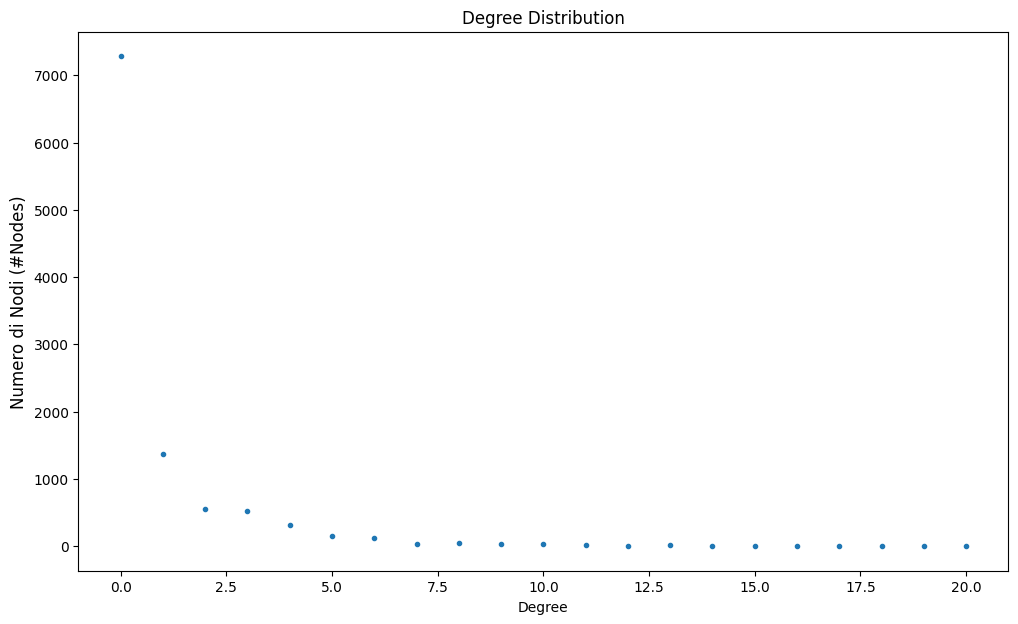

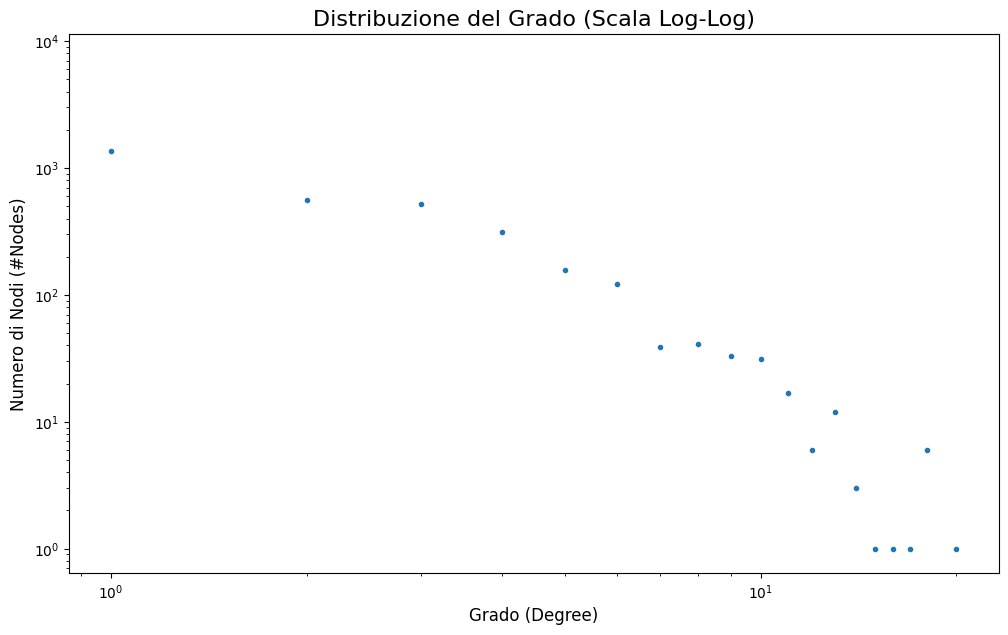

In [10]:
hist = nx.degree_histogram(G)
plt.figure(figsize = (12, 7))
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Numero di Nodi (#Nodes)", fontsize = 12)
plt.show()

plt.figure(figsize=(12, 7))
plt.loglog(range(0, len(hist)), hist, ".")
plt.title("Distribuzione del Grado (Scala Log-Log)", fontsize=16)
plt.xlabel("Grado (Degree)", fontsize=12)
plt.ylabel("Numero di Nodi (#Nodes)", fontsize=12)
plt.show()

Analisi Dettagliata delle Componenti Connesse
Numero totale di componenti connesse (isole): 8426
Numero totale di nodi nella rete: 10510

Dettaglio delle 5 Componenti più Grandi
1. Componente #1:
   - Dimensione: 24 nodi
   - Percentuale sul totale: 0.23%
2. Componente #2:
   - Dimensione: 20 nodi
   - Percentuale sul totale: 0.19%
3. Componente #3:
   - Dimensione: 18 nodi
   - Percentuale sul totale: 0.17%
4. Componente #4:
   - Dimensione: 18 nodi
   - Percentuale sul totale: 0.17%
5. Componente #5:
   - Dimensione: 17 nodi
   - Percentuale sul totale: 0.16%
6. Componente #6:
   - Dimensione: 17 nodi
   - Percentuale sul totale: 0.16%
7. Componente #7:
   - Dimensione: 15 nodi
   - Percentuale sul totale: 0.14%
8. Componente #8:
   - Dimensione: 14 nodi
   - Percentuale sul totale: 0.13%
9. Componente #9:
   - Dimensione: 13 nodi
   - Percentuale sul totale: 0.12%
10. Componente #10:
   - Dimensione: 12 nodi
   - Percentuale sul totale: 0.11%


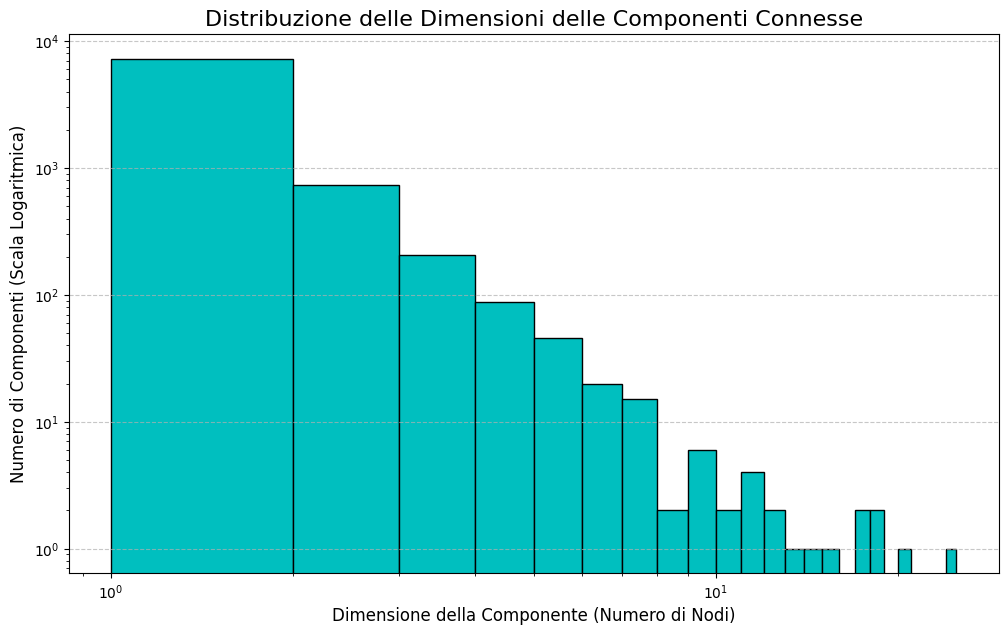


La componente più grande (usata per l'analisi dei percorsi) ha 24 nodi.


In [11]:
print("Analisi Dettagliata delle Componenti Connesse")

# Mi assicuro che il grafo G esista
if 'G' not in locals():
    print("ERRORE: Il grafo 'G' non è definito. Assicurati di aver eseguito le celle precedenti.")
else:
    # Trova tutte le componenti connesse e ordinale per dimensione
    connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
    
    num_components = len(connected_components)
    total_nodes = G.number_of_nodes()
    
    print(f"Numero totale di componenti connesse (isole): {num_components}")
    print(f"Numero totale di nodi nella rete: {total_nodes}")

    if num_components > 0:
        #Analizza e stampa i dettagli delle prime 5 componenti
        print("\nDettaglio delle 5 Componenti più Grandi")
        for i, component in enumerate(connected_components[:10]):
            component_size = len(component)
            percentage = (component_size / total_nodes) * 100
            print(f"{i+1}. Componente #{i+1}:")
            print(f"   - Dimensione: {component_size} nodi")
            print(f"   - Percentuale sul totale: {percentage:.2f}%")
        
        # Ottieni una lista di tutte le dimensioni delle componenti per analizzarne la distribuzione 
        component_sizes = [len(c) for c in connected_components]
        
        plt.figure(figsize=(12, 7))
        plt.hist(component_sizes, bins=range(1, max(component_sizes) + 2), log=True, color='c', edgecolor='black')
        plt.title("Distribuzione delle Dimensioni delle Componenti Connesse", fontsize=16)
        plt.xlabel("Dimensione della Componente (Numero di Nodi)", fontsize=12)
        plt.ylabel("Numero di Componenti (Scala Logaritmica)", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xscale('log') # Usiamo anche la scala logaritmica sull'asse x per vedere meglio le code
        plt.show()

        giant_component_nodes = connected_components[0]
        G_cc = G.subgraph(giant_component_nodes).copy()
        print(f"\nLa componente più grande (usata per l'analisi dei percorsi) ha {G_cc.number_of_nodes()} nodi.")

In [12]:
import networkx as nx
import random

print("\n Analisi dei Cammini (sulla Componente Gigante)")

if 'G_cc' not in locals() or not G_cc:
    print("ERRORE: La componente gigante 'G_cc' non è definita. Esegui prima l'analisi delle componenti.")
else:
    print(f"Analizzo la Componente Gigante, che ha {G_cc.number_of_nodes()} nodi.")

    
    # Calcolo del Cammino Minimo Medio
    try:
        avg_path_length = nx.average_shortest_path_length(G_cc)
        print(f"\nCammino Minimo Medio (Average Shortest Path): {avg_path_length:.2f}")
    except nx.NetworkXError as e:
        print(f"Impossibile calcolare il cammino minimo medio: {e}")
        avg_path_length = "N/A"

    # Calcolo del Diametro 
    try:
        diameter = nx.diameter(G_cc)
        print(f"Diametro della Componente Gigante: {diameter}")
    except nx.NetworkXError as e:
        print(f"Impossibile calcolare il diametro: {e}")
        diameter = "N/A"

    # Esempio di Cammino Minimo tra due Nodi Specifici
    nodes_list = list(G_cc.nodes())
    node1 = random.choice(nodes_list)
    node2 = random.choice(nodes_list)

    while node1 == node2:
        node2 = random.choice(nodes_list)

    try:
        shortest_path = nx.shortest_path(G_cc, source=node1, target=node2)
        shortest_path_length = len(shortest_path) - 1 
        
        print("\n Esempio di Cammino Minimo Specifico")
        print(f"Il cammino minimo tra l'articolo {node1} e l'articolo {node2} è lungo {shortest_path_length} passi.")
        print("Il percorso attraversa i seguenti nodi (articoli):")
        print(" -> ".join(map(str, shortest_path)))
        
        # Mostriamo anche le fonti di questi articoli
        path_sources = [G.nodes[node]['source'] for node in shortest_path]
        print("Fonti degli articoli nel percorso:")
        print(" -> ".join(path_sources))

    except nx.NetworkXNoPath:
        print(f"\nNon esiste un percorso tra il nodo {node1} e il nodo {node2}.")
    except Exception as e:
        print(f"Errore nel calcolare il cammino minimo specifico: {e}")


 Analisi dei Cammini (sulla Componente Gigante)
Analizzo la Componente Gigante, che ha 24 nodi.

Cammino Minimo Medio (Average Shortest Path): 1.96
Diametro della Componente Gigante: 5

 Esempio di Cammino Minimo Specifico
Il cammino minimo tra l'articolo 7549 e l'articolo 7558 è lungo 1 passi.
Il percorso attraversa i seguenti nodi (articoli):
7549 -> 7558
Fonti degli articoli nel percorso:
L'Unione Sarda.it -> Gazzettino


In [13]:
density = nx.density(G)
clustering = nx.average_clustering(G)
print(f"The density is {density:.6f}")
print(f"The average clustering in the network is {clustering:.3f}")

The density is 0.000078
The average clustering in the network is 0.143


In [14]:
!pip install tqdm

In [15]:
import networkx as nx
import pandas as pd
from tqdm.notebook import tqdm  # serve per una barra di avanzamento più bella in Jupyter
import random

print("\n Analisi di Centralità (con barra di avanzamento e campionamento)")

if 'G' not in locals():
    print("ERRORE: Il grafo 'G' non è definito. Assicurati di aver eseguito le celle precedenti.")
else:
    print("Calcolo Degree Centrality (veloce)...")
    degree_centrality = nx.degree_centrality(G)
    
    print("Calcolo PageRank (veloce)...")
    pagerank = nx.pagerank(G, weight='weight')

    # Calcolo della Betweenness Centrality (su un campione perché troppo pesante da essere eseguita su tutti i nodi)
    SAMPLE_SIZE = 10000 
    if G.number_of_nodes() > SAMPLE_SIZE:
        print(f"\nLa rete è molto grande. Calcolo della Betweenness Centrality su un campione di {SAMPLE_SIZE} nodi.")
        # Usiamo tqdm per mostrare l'avanzamento del campionamento
        nodes_sample = random.sample(list(G.nodes()), SAMPLE_SIZE)
        
        # Aggiungiamo tqdm alla funzione di betweenness
        # k=SAMPLE_SIZE specifica che il calcolo è un'approssimazione basata su quel numero di nodi
        betweenness_centrality = nx.betweenness_centrality(G, k=SAMPLE_SIZE, seed=42)
        
    else:
        print("\nCalcolo della Betweenness Centrality (sull'intero grafo)...")
        betweenness_centrality = nx.betweenness_centrality(G)

    #print("Tutti i calcoli di centralità sono stati completati.")

    
    def get_top_nodes(centrality_dict, top_n=5):
        # Usiamo tqdm per mostrare l'avanzamento dell'ordinamento, che può essere lento
        print(f"Ordinamento di {len(centrality_dict)} nodi...")
        sorted_nodes = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
        return sorted_nodes[:top_n]

    print("\n Nodi Più Importanti")

    print("\nTop 5 per Degree Centrality (Hubs):")
    top_degree = get_top_nodes(degree_centrality)
    for node_id, score in top_degree:
        print(f"  - Titolo: {G.nodes[node_id]['title']} (Fonte: {G.nodes[node_id]['source']}) | Score: {score:.4f}")

    print("\nTop 5 per Betweenness Centrality (Bridges - stimato su campione):")
    top_betweenness = get_top_nodes(betweenness_centrality)
    for node_id, score in top_betweenness:
        print(f"  - Titolo: {G.nodes[node_id]['title']} (Fonte: {G.nodes[node_id]['source']}) | Score: {score:.4e}") # Usiamo notazione scientifica per valori piccoli

    print("\nTop 5 per PageRank (Influencers):")
    top_pagerank = get_top_nodes(pagerank)
    for node_id, score in top_pagerank:
        print(f"  - Titolo: {G.nodes[node_id]['title']} (Fonte: {G.nodes[node_id]['source']}) | Score: {score:.4f}")


 Analisi di Centralità (con barra di avanzamento e campionamento)
Calcolo Degree Centrality (veloce)...
Calcolo PageRank (veloce)...

La rete è molto grande. Calcolo della Betweenness Centrality su un campione di 10000 nodi.

 Nodi Più Importanti

Top 5 per Degree Centrality (Hubs):
Ordinamento di 10510 nodi...
  - Titolo: Tajani: "Salvini su Macron? Non si vince con la violenza delle parole. La politica estera la fa il ministro degli Esteri" (Fonte: Il Fatto Quotidiano) | Score: 0.0019
  - Titolo: Tajani,Salvini? Forza idee vince sempre su violenza delle parole (Fonte: QuotidianoNet) | Score: 0.0017
  - Titolo: ++ Tajani,Salvini? Forza idee vince sempre su violenza parole ++ - Notizie - Ansa.it (Fonte: ANSA.it) | Score: 0.0017
  - Titolo: Insulti di Salvini a Macron, Tajani: "La forza delle idee vince sempre sulla violenza delle parole" (Fonte: lastampa.it) | Score: 0.0017
  - Titolo: Piantedosi, anche Casapound rientra negli sgomberi (Fonte: QuotidianoNet) | Score: 0.0017

Top 5 per

Inizio Confronto con Modelli Teorici
Parametri della Rete Reale: Nodi=10510, Archi=4321

Calcolo delle metriche per le tre reti...
  > La componente gigante di 'Reale (G)' è piccola (24 nodi). Calcolo i percorsi...
  > La componente gigante di 'Casuale (ER)' è piccola (64 nodi). Calcolo i percorsi...
  > ATTENZIONE: La componente gigante di 'Scale-Free (BA)' è troppo grande (10510 nodi). Salto il calcolo dei percorsi.

--- Tabella di Confronto delle Metriche ---
                 # Nodi  # Archi  # Componenti  Dim. Comp. Gigante  \
Rete                                                                 
Reale (G)         10510     4321          8426                  24   
Casuale (ER)      10510     4290          6221                  64   
Scale-Free (BA)   10510    10509             1               10510   

                 Coeff. Clustering Medio(LCC)  Cammino Medio (LCC)  \
Rete                                                                 
Reale (G)                              0.6

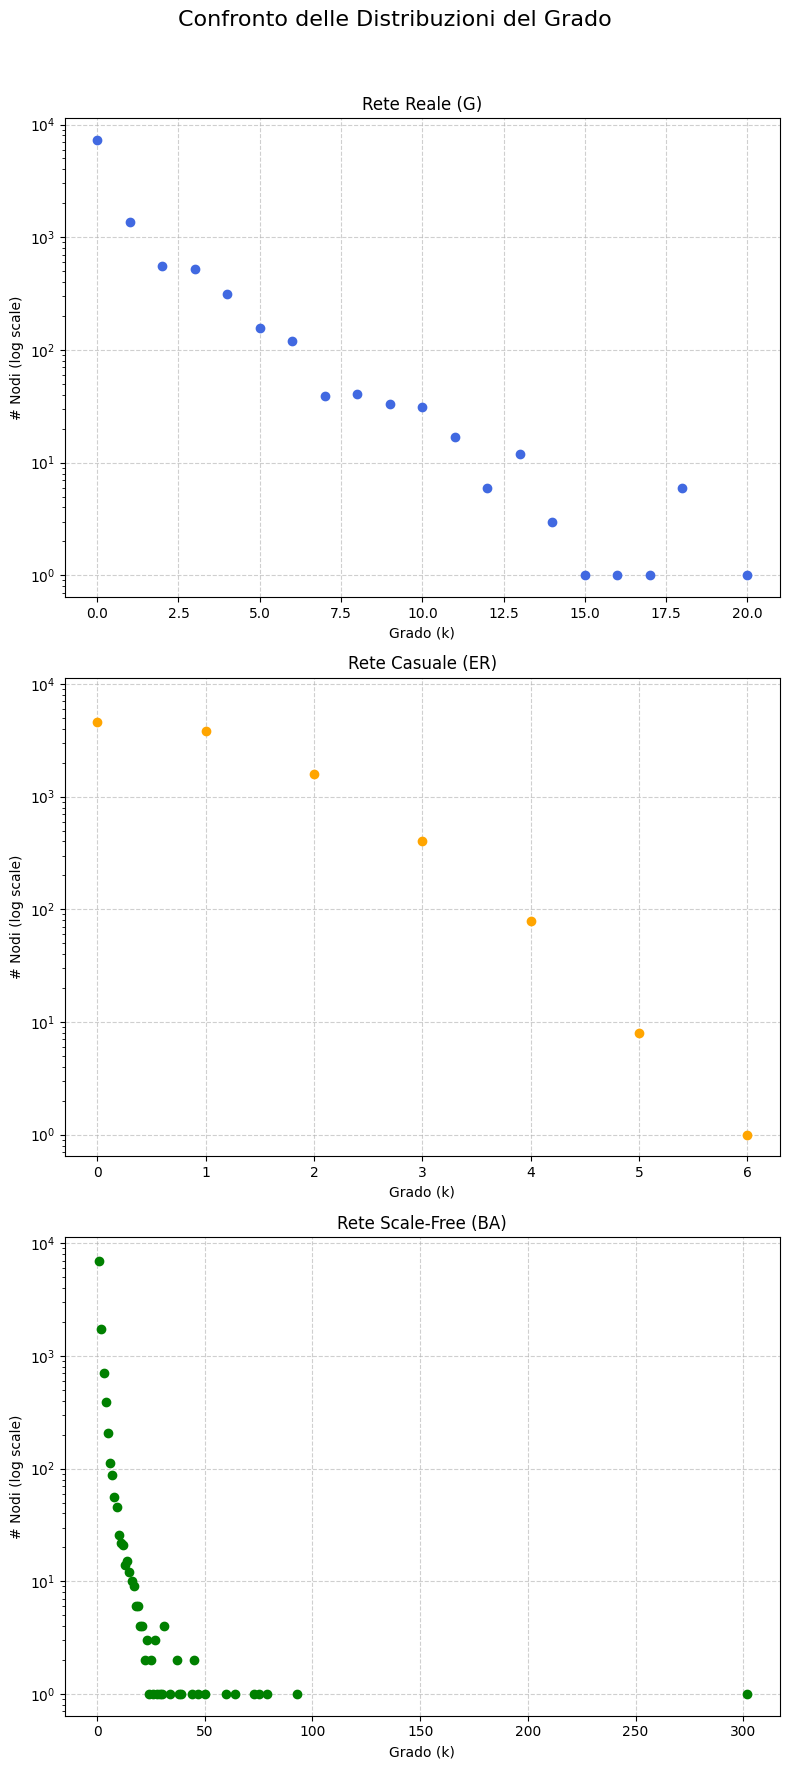

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

print("Inizio Confronto con Modelli Teorici")

if 'G' not in locals():
    assert False, "ERRORE: Il grafo 'G' non è definito."

n = G.number_of_nodes()
m = G.number_of_edges()
print(f"Parametri della Rete Reale: Nodi={n}, Archi={m}")

# Generazione Grafi Sintetici 
p = (2 * m) / (n * (n - 1)) if n > 1 else 0
G_er = nx.erdos_renyi_graph(n, p, seed=42)

avg_k = 2 * m / n
m_ba = int(round(avg_k / 2))
if m_ba < 1: m_ba = 1
G_ba = nx.barabasi_albert_graph(n, m_ba, seed=42)

# Funzione per il Calcolo delle Metriche
def get_network_metrics_optimized(G, name, path_calc_threshold=2000):
    metrics = {"Rete": name}
    metrics["# Nodi"] = G.number_of_nodes()
    metrics["# Archi"] = G.number_of_edges()
    
    if G.number_of_nodes() == 0:
        metrics.update({"# Componenti": 0, "Dim. Comp. Gigante": 0, "Coeff. Clustering Medio(LCC)": 0, "Cammino Medio (LCC)": 0, "Diametro (LCC)": 0})
        return metrics
    
    # Gestione per grafi non connessi
    if nx.is_connected(G):
        lcc = G
        components = [lcc]
    else:
        components = sorted(nx.connected_components(G), key=len, reverse=True)
        lcc_nodes = components[0]
        lcc = G.subgraph(lcc_nodes).copy()
        
    metrics["# Componenti"] = len(components)
    
    if lcc.number_of_nodes() > 0:
        metrics["Dim. Comp. Gigante"] = lcc.number_of_nodes()
        metrics["Coeff. Clustering Medio(LCC)"] = nx.average_clustering(lcc)
        
        if lcc.number_of_nodes() < path_calc_threshold:
            print(f"  > La componente gigante di '{name}' è piccola ({lcc.number_of_nodes()} nodi). Calcolo i percorsi...")
            metrics["Cammino Medio (LCC)"] = nx.average_shortest_path_length(lcc)
            metrics["Diametro (LCC)"] = nx.diameter(lcc)
        else:
            print(f"  > ATTENZIONE: La componente gigante di '{name}' è troppo grande ({lcc.number_of_nodes()} nodi). Salto il calcolo dei percorsi.")
            metrics["Cammino Medio (LCC)"] = np.nan
            metrics["Diametro (LCC)"] = np.nan
    else:
        metrics.update({"Dim. Comp. Gigante": 0, "Coeff. Clustering Medio(LCC)": 0, "Cammino Medio (LCC)": 0, "Diametro (LCC)": 0})
        
    return metrics

print("\nCalcolo delle metriche per le tre reti...")
metrics_real = get_network_metrics_optimized(G, "Reale (G)")
metrics_er = get_network_metrics_optimized(G_er, "Casuale (ER)")
metrics_ba = get_network_metrics_optimized(G_ba, "Scale-Free (BA)")

df_comparison = pd.DataFrame([metrics_real, metrics_er, metrics_ba])
print("\n--- Tabella di Confronto delle Metriche ---")
print(df_comparison.set_index('Rete').round(4))

print("\nGenerazione del grafico comparativo verticale corretto...")

# Ogni grafico avrà il suo asse x indipendente.
fig, axes = plt.subplots(3, 1, figsize=(8, 18), sharey=True)
fig.suptitle('Confronto delle Distribuzioni del Grado', fontsize=16)

# Grafico 1: Rete Reale 
degree_sequence_real = sorted([d for n, d in G.degree()], reverse=True)
hist_real = nx.degree_histogram(G)
axes[0].plot(range(len(hist_real)), hist_real, 'o', color='royalblue')
axes[0].set_title('Rete Reale (G)')
axes[0].set_ylabel('# Nodi (log scale)')
axes[0].set_yscale('log') # Usare la scala logaritmica è fondamentale per vedere la coda lunga
axes[0].set_xlabel('Grado (k)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Grafico 2: Rete Casuale (ER)
degree_sequence_er = sorted([d for n, d in G_er.degree()], reverse=True)
hist_er = nx.degree_histogram(G_er)
axes[1].plot(range(len(hist_er)), hist_er, 'o', color='orange')
axes[1].set_title('Rete Casuale (ER)')
axes[1].set_ylabel('# Nodi (log scale)')
axes[1].set_yscale('log')
axes[1].set_xlabel('Grado (k)')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Grafico 3: Rete Scale-Free (BA)
degree_sequence_ba = sorted([d for n, d in G_ba.degree()], reverse=True)
hist_ba = nx.degree_histogram(G_ba)
axes[2].plot(range(len(hist_ba)), hist_ba, 'o', color='green')
axes[2].set_title('Rete Scale-Free (BA)')
axes[2].set_ylabel('# Nodi (log scale)')
axes[2].set_yscale('log')
axes[2].set_xlabel('Grado (k)')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()